In [193]:
%ls

data_description.txt  sample_submission.csv     test.csv     train.csv
homedata.ipynb        sample_submission.csv.gz  test.csv.gz


In [194]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

Load data

In [195]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Explore data

In [196]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [197]:
train_data.set_index('Id')
test_data.set_index('Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [198]:
df = pd.concat([train_data, test_data])

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [200]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [201]:
unique_vars = [x for x in list(train_data.columns) if x not in list(test_data.columns)]
unique_vars

['SalePrice']

In [202]:
df.select_dtypes(exclude = 'object').corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


In [203]:
print(f'Year range of data: {df.YrSold.min()} - {df.YrSold.max()}')

Year range of data: 2006 - 2010


In [204]:
numeric_cols = df.select_dtypes(exclude = 'object').columns
cat_cols = df.select_dtypes(include = 'object').columns

In [207]:
for col in cat_cols:
    print(f'{col} has {len(set(df[col]))} values: {set(df[col])}')

MSZoning has 6 values: {'RL', 'C (all)', 'FV', 'RH', nan, 'RM'}
Street has 2 values: {'Pave', 'Grvl'}
Alley has 3 values: {nan, 'Grvl', 'Pave'}
LotShape has 4 values: {'IR2', 'IR1', 'IR3', 'Reg'}
LandContour has 4 values: {'HLS', 'Low', 'Bnk', 'Lvl'}
Utilities has 3 values: {nan, 'NoSeWa', 'AllPub'}
LotConfig has 5 values: {'FR3', 'CulDSac', 'FR2', 'Inside', 'Corner'}
LandSlope has 3 values: {'Gtl', 'Sev', 'Mod'}
Neighborhood has 25 values: {'SawyerW', 'ClearCr', 'Crawfor', 'Edwards', 'StoneBr', 'NPkVill', 'Mitchel', 'BrkSide', 'NWAmes', 'Veenker', 'Blueste', 'SWISU', 'NAmes', 'Timber', 'MeadowV', 'Sawyer', 'Gilbert', 'CollgCr', 'Blmngtn', 'OldTown', 'IDOTRR', 'Somerst', 'NoRidge', 'BrDale', 'NridgHt'}
Condition1 has 9 values: {'Norm', 'RRAe', 'RRNe', 'RRAn', 'RRNn', 'PosN', 'Artery', 'PosA', 'Feedr'}
Condition2 has 8 values: {'Norm', 'RRAe', 'RRAn', 'RRNn', 'PosN', 'Artery', 'PosA', 'Feedr'}
BldgType has 5 values: {'Twnhs', 'TwnhsE', '1Fam', 'Duplex', '2fmCon'}
HouseStyle has 8 values

Treating numeric columns

In [205]:
def split_num_feats(df, numeric_cols):
    """Create new lists of categorical and continuous numerical features for all the numeric columns in a dataset.
    Features with less than 20 unique items are classified as categorical."""
    
    cont_num_feats = []
    cat_num_feats = []
    
    for col in numeric_cols:
        if len(set(df[col])) <= 20:
            print(f'Categories in {col} feature: {set(df[col])}')
            cat_num_feats.append(col)
        else:
            print(f'{col} is a continuous feature')
            cont_num_feats.append(col)
    return cont_num_feats, cat_num_feats

cont_num_cols, cat_num_cols = split_num_feats(df, numeric_cols)

Id is a continuous feature
Categories in MSSubClass feature: {160, 70, 40, 75, 45, 80, 50, 20, 85, 180, 30, 120, 150, 90, 60, 190}
LotFrontage is a continuous feature
LotArea is a continuous feature
Categories in OverallQual feature: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Categories in OverallCond feature: {1, 2, 3, 4, 5, 6, 7, 8, 9}
YearBuilt is a continuous feature
YearRemodAdd is a continuous feature
MasVnrArea is a continuous feature
BsmtFinSF1 is a continuous feature
BsmtFinSF2 is a continuous feature
BsmtUnfSF is a continuous feature
TotalBsmtSF is a continuous feature
1stFlrSF is a continuous feature
2ndFlrSF is a continuous feature
LowQualFinSF is a continuous feature
GrLivArea is a continuous feature
Categories in BsmtFullBath feature: {0.0, 1.0, 2.0, 3.0, nan, nan}
Categories in BsmtHalfBath feature: {0.0, 1.0, 2.0, nan, nan}
Categories in FullBath feature: {0, 1, 2, 3, 4}
Categories in HalfBath feature: {0, 1, 2}
Categories in BedroomAbvGr feature: {0, 1, 2, 3, 4, 5, 6, 8}
Categori

In [208]:
true_nan_cols = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars', 'PoolArea']

In [209]:
def fill_numerical_cols(df, cont_num_cols, cat_num_cols, true_nans):
    numeric_cols = cont_num_cols + cat_num_cols
    
    for col in numeric_cols:
        #if feature is continuous, or is categorical but NaN values are not legitimate information, fill NaN's with mean
        if (col in cont_num_cols) or (col not in true_nans):
            df[col] = df[col].fillna(np.mean(df[col]))
            
        #otherwise, fill NaN's with -1 to indicate that NaN values have meaning
        elif (col in cat_num_cols) and (col in true_nans):
            df[col] = df[col].fillna(-1)
    return df

df = fill_numerical_cols(df, cont_num_cols, cat_num_cols, true_nan_cols)

Treating categorical columns

In [210]:
cat_true_nans = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',\
                'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

#identify categorical features where NaN values actually indicate missing data, and should be filled
cat_bad_nans = [feat for feat in cat_cols if feat not in cat_true_nans]

for col in df[cat_true_nans]:
    df[col] = df[col].fillna('N/A')

#for features where NaN values are not meaningful, fill with most commonly occuring category
for col in df[cat_bad_nans]:
    df[col]=df[col].fillna(df[col].value_counts().index[0])

In [211]:
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
383,1844,85,RL,69.305795,8014,Pave,N/A,IR1,Lvl,AllPub,...,0,N/A,N/A,N/A,0,6,2009,WD,Normal,180921.19589
1194,2655,20,RL,120.000000,14780,Pave,N/A,IR1,HLS,AllPub,...,0,N/A,N/A,N/A,0,6,2006,WD,Normal,180921.19589
293,1754,60,RL,80.000000,9600,Pave,N/A,Reg,Lvl,AllPub,...,0,N/A,N/A,N/A,0,5,2009,COD,Abnorml,180921.19589
583,2044,20,RL,85.000000,11050,Pave,N/A,Reg,Lvl,AllPub,...,0,N/A,GdWo,N/A,0,10,2008,WD,Family,180921.19589
86,1547,50,RM,53.000000,6360,Pave,N/A,Reg,Lvl,AllPub,...,0,N/A,N/A,N/A,0,3,2010,WD,Normal,180921.19589
1329,2790,90,RM,33.000000,5976,Pave,N/A,Reg,Lvl,AllPub,...,0,N/A,N/A,N/A,0,12,2006,WD,Normal,180921.19589
722,2183,20,RL,74.000000,9627,Pave,N/A,Reg,Lvl,AllPub,...,0,N/A,N/A,N/A,0,6,2008,WD,Normal,180921.19589
587,2048,20,RL,65.000000,8125,Pave,N/A,Reg,Lvl,AllPub,...,0,N/A,N/A,N/A,0,7,2008,WD,Normal,180921.19589
1174,2635,85,RL,69.305795,10464,Pave,N/A,IR1,Lvl,AllPub,...,0,N/A,N/A,N/A,0,6,2006,WD,Normal,180921.19589
591,2052,20,RL,90.000000,9900,Pave,N/A,Reg,Lvl,AllPub,...,0,N/A,N/A,N/A,0,5,2008,COD,Abnorml,180921.19589


<Axes: title={'center': 'SalePrice'}, xlabel='ExterQual'>

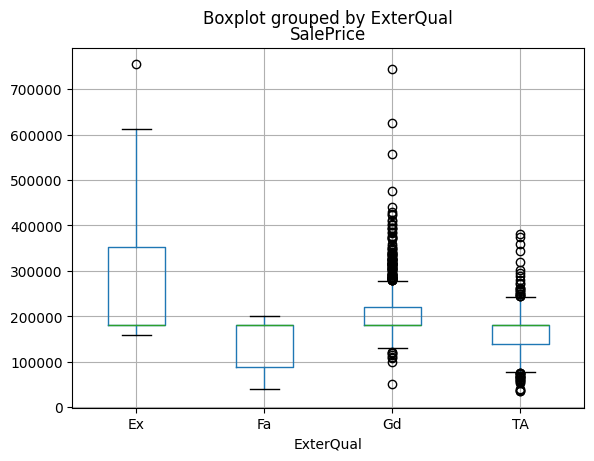

In [212]:
df.boxplot(column = 'SalePrice', by = 'ExterQual')

<Axes: title={'center': 'SalePrice'}, xlabel='BsmtQual'>

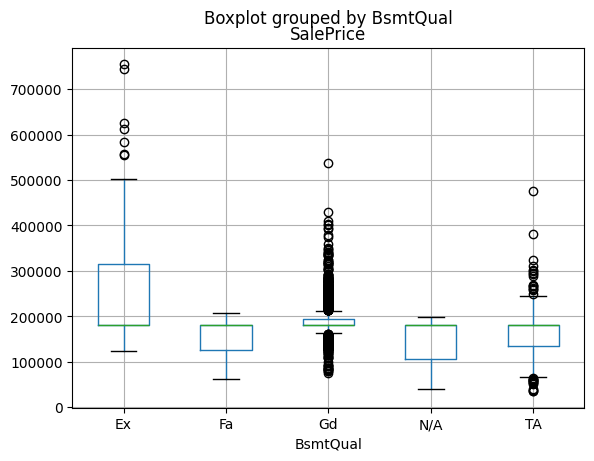

In [213]:
df.boxplot(column = 'SalePrice', by = 'BsmtQual')

In [214]:
df_cat_cols = df[cat_cols]
df_cat_cols.head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal
1,RL,Pave,N/A,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal
2,RL,Pave,N/A,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal
3,RL,Pave,N/A,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,N/A,N/A,N/A,WD,Abnorml
4,RL,Pave,N/A,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal


In [215]:
df_cat_ohe = pd.get_dummies(df_cat_cols, prefix_sep='_', dummy_na=False, drop_first=False)
df_cat_ohe.columns

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_N/A',
       'Alley_Pave',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=265)

In [216]:
df_transformed = pd.concat([df.select_dtypes(exclude = 'object'), df_cat_ohe], axis = 1)
df_transformed.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,True,False,False,False,False,True,False


Add new features

In [217]:
#total square footage feature 
df_transformed['TotalSF'] = df_transformed['TotalBsmtSF'] + df_transformed['1stFlrSF'] + df_transformed['2ndFlrSF']
#total number of bathrooms
df_transformed['TotalBaths'] = df_transformed['FullBath'] + (0.5*df_transformed['HalfBath']) + df_transformed['BsmtFullBath'] + (0.5*df_transformed['BsmtHalfBath'])
#total porch square footage
df_transformed['PorchSF'] = df_transformed['WoodDeckSF'] + df_transformed['OpenPorchSF'] + df_transformed['EnclosedPorch'] + df_transformed['3SsnPorch'] + df_transformed['ScreenPorch']
#age of home at the time of remodelling
df_transformed['AgeAtRemod'] = df_transformed['YearRemodAdd'] - df_transformed['YearBuilt']
#age of home since remodelling
df_transformed['AgeSinceRemod'] = df_transformed['YrSold'] - df_transformed['YearRemodAdd']
# #whether or not the home has a pool
df_transformed['Pool'] = df_transformed['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
#whether or not the home has a 2nd floor
df_transformed['2ndFlr'] = df_transformed['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
#whether or not the home has a garage
df_transformed['Garage'] = df_transformed['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
#whether or not the home has a fireplace
df_transformed['FirePlace'] = df_transformed['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
#whether or not the home has a basement
df_transformed['Bsmt'] = df_transformed['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

Training

In [218]:
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS, summarize)

In [219]:
df_transformed = df_transformed.drop(['Id'], axis = 1)

In [220]:
X = df_transformed.drop(['SalePrice'], axis = 1)
y = df_transformed['SalePrice']

In [221]:
X_ms = MS(X).fit_transform(df_transformed)
model1 = sm.OLS(y, X_ms).fit()
summarize(model1)

,coef,std err,t,P>|t|
intercept,-74640.0000,119000.000,-0.630,0.529
MSSubClass,13.8765,93.074,0.149,0.881
LotFrontage,-11.2418,56.674,-0.198,0.843
LotArea,0.7794,0.150,5.181,0.000
OverallQual,3295.4450,1225.069,2.690,0.007
...,...,...,...,...
Pool,-273000.0000,54900.000,-4.976,0.000
2ndFlr,-5860.2815,8530.435,-0.687,0.492
Garage,-27420.0000,56200.000,-0.487,0.626
FirePlace,-32620.0000,53900.000,-0.605,0.545


In [222]:
model1.summary().tables[0]

Dep. Variable:,SalePrice,R-squared:,0.516
Model:,OLS,Adj. R-squared:,0.470
Method:,Least Squares,F-statistic:,11.05
Date:,"Sat, 21 Dec 2024",Prob (F-statistic):,1.52e-270
Time:,16:16:54,Log-Likelihood:,-35004.
No. Observations:,2919,AIC:,7.052e+04
Df Residuals:,2661,BIC:,7.207e+04
Df Model:,257,,
Covariance Type:,nonrobust,,


In [224]:
model1_summa = model1.summary()
type(model1_summa.tables[1])

statsmodels.iolib.table.SimpleTable

What if we normalize values of the data

In [225]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_transformedScaled = pd.DataFrame(scaler.fit_transform(df_transformed), columns = df_transformed.columns, index = df_transformed.index)

In [227]:
X_ms = MS(df_transformedScaled.columns.drop('SalePrice')).fit_transform(df_transformedScaled)
model2 = sm.OLS(y, X_ms).fit()
summarize(model2)

,coef,std err,t,P>|t|
intercept,180900.0000,757.266,238.914,0.000
MSSubClass,589.8938,3956.603,0.149,0.881
LotFrontage,-239.5471,1207.640,-0.198,0.843
LotArea,6146.1867,1186.179,5.181,0.000
OverallQual,4645.6075,1726.986,2.690,0.007
...,...,...,...,...
Pool,-18180.0000,3652.662,-4.976,0.000
2ndFlr,-2900.0872,4221.471,-0.687,0.492
Garage,1718.0124,3445.205,0.499,0.618
FirePlace,28.4164,763.231,0.037,0.970


In [237]:
model2.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
intercept,180921.195890,757.265889,238.913701,0.000000e+00,179436.306620,182406.085161
MSSubClass,589.893758,3956.603143,0.149091,8.814932e-01,-7168.434776,8348.222293
LotFrontage,-239.547070,1207.639710,-0.198360,8.427788e-01,-2607.554496,2128.460355
LotArea,6146.186709,1186.179338,5.181499,2.365934e-07,3820.259981,8472.113437
OverallQual,4645.607462,1726.986251,2.690008,7.189651e-03,1259.236318,8031.978607
...,...,...,...,...,...,...
Pool,-18176.735501,3652.661687,-4.976299,6.894464e-07,-25339.078646,-11014.392356
2ndFlr,-2900.087220,4221.470580,-0.686985,4.921520e-01,-11177.782627,5377.608187
Garage,1718.012361,3445.204827,0.498668,6.180547e-01,-5037.537780,8473.562502
FirePlace,28.416357,763.230725,0.037232,9.703031e-01,-1468.169097,1525.001811


In [247]:
model2.mse_total

3155555632.148724

In [245]:
np.log2(model2.mse_total)

31.555246912179058

Try to fit the minimum amount of features

In [269]:
related_col = []
for idx in model2.pvalues.index:
    if idx != 'intercept' and model2.pvalues[idx] < 0.1:
        related_col.append(idx)

In [271]:
df_transformed_p = df_transformedScaled[related_col] 
df_transformed_p.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,BedroomAbvGr,...,PoolQC_Fa,PoolQC_Gd,Fence_MnWw,MiscFeature_Gar2,MiscFeature_N/A,SaleType_WD,TotalSF,AgeAtRemod,AgeSinceRemod,Pool
0,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.580907,-0.444328,1.207379,0.413547,0.169927,...,-0.026185,-0.037043,-0.064249,-0.041423,0.193167,0.394439,0.022570,-0.538275,-0.887009,-0.066884
1,-0.072044,-0.063185,2.188279,0.154764,-0.395604,1.178112,0.477111,-0.785025,-0.471891,0.169927,...,-0.026185,-0.037043,-0.064249,-0.041423,0.193167,0.394439,-0.029638,-0.538275,0.357696,-0.066884
2,0.137197,0.646183,-0.507284,0.980221,0.848965,0.097873,-0.299076,1.235375,0.563755,0.169927,...,-0.026185,-0.037043,-0.064249,-0.041423,0.193167,0.394439,0.196596,-0.496714,-0.839135,-0.066884
3,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.494941,-0.671283,0.978742,0.427382,0.169927,...,-0.026185,-0.037043,-0.064249,-0.041423,0.193167,0.394439,-0.093033,1.747534,0.597063,-0.066884
4,0.518903,1.355551,-0.507284,0.947203,0.753229,0.468931,0.211573,1.671651,1.378042,1.385655,...,-0.026185,-0.037043,-0.064249,-0.041423,0.193167,0.394439,0.988413,-0.538275,-0.743389,-0.066884


In [273]:
X_ms = MS(df_transformed_p).fit_transform(df_transformedScaled)
model3 = sm.OLS(y, X_ms).fit()
summarize(model3)

,coef,std err,t,P>|t|
intercept,180900.0000,750.027,241.220,0.000
LotArea,6486.3049,994.747,6.521,0.000
OverallQual,5524.3110,1417.591,3.897,0.000
OverallCond,4888.1451,951.785,5.136,0.000
YearBuilt,6549.6651,4055.180,1.615,0.106
...,...,...,...,...
SaleType_WD,-2959.0003,815.895,-3.627,0.000
TotalSF,27520.0000,13800.000,1.996,0.046
AgeAtRemod,-1988.0496,3218.064,-0.618,0.537
AgeSinceRemod,5687.0789,12100.000,0.468,0.640


In [278]:
np.log2(model3.mse_total)

31.555246912179058

In [277]:
model1.summary().tables[0]

Dep. Variable:,SalePrice,R-squared:,0.516
Model:,OLS,Adj. R-squared:,0.470
Method:,Least Squares,F-statistic:,11.05
Date:,"Sat, 21 Dec 2024",Prob (F-statistic):,1.52e-270
Time:,16:35:37,Log-Likelihood:,-35004.
No. Observations:,2919,AIC:,7.052e+04
Df Residuals:,2661,BIC:,7.207e+04
Df Model:,257,,
Covariance Type:,nonrobust,,


In [275]:
model3.summary().tables[0]

Dep. Variable:,SalePrice,R-squared:,0.490
Model:,OLS,Adj. R-squared:,0.480
Method:,Least Squares,F-statistic:,46.59
Date:,"Sat, 21 Dec 2024",Prob (F-statistic):,0.00
Time:,16:34:24,Log-Likelihood:,-35081.
No. Observations:,2919,AIC:,7.028e+04
Df Residuals:,2859,BIC:,7.064e+04
Df Model:,59,,
Covariance Type:,nonrobust,,


Reduce 198 columns but R^2 only down from 0.516 to 0.48, and Adjusted R^2 improve 0.01 compared to model1